활용데이터: timesData.csv(전 세계 대학교 랭킹 데이터)  
출처: https://www.timeshighereducation.com/world-university-rankings  
(2603 rows * 14 features)

* world_rank: 세계 랭크  

* university_name: 대학교 명칭  

* country: 대학교 소재지  

* teaching: 대학교 교육(티칭) 점수  

* international: 국제 전망 점수(직원, 학생, 연구실적)  

* research: 연구실적 점수(수량, 수입, 평판)  

* citations: 인용 점수(연구 영향력)  

* income: 소득 점수  

* total_score: 랭크를 결정 짓기 위한 실질적 통합 점수  

* num_students: 각 대학교의 전체 학생 수  

* student_staff_ratio: 직원 대비 학생 수  

* international_students: 국제 학생 비율  

* female_male_ratio: 남녀 학생 비율  

* year: 랭킹 연도

In [32]:
import pandas as pd
import plotly

#라이브러리 import

In [17]:
timesdata = pd.read_csv('timesData.csv')
timesdata.info()
#데이터프레임 정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [18]:
timesdata.head(10)
#상위 10개 출력

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


# 선 그래프(Line Charts)
  
  ### top 100 순위권 대학교에 대한 인용 점수와 교육(티칭) 점수

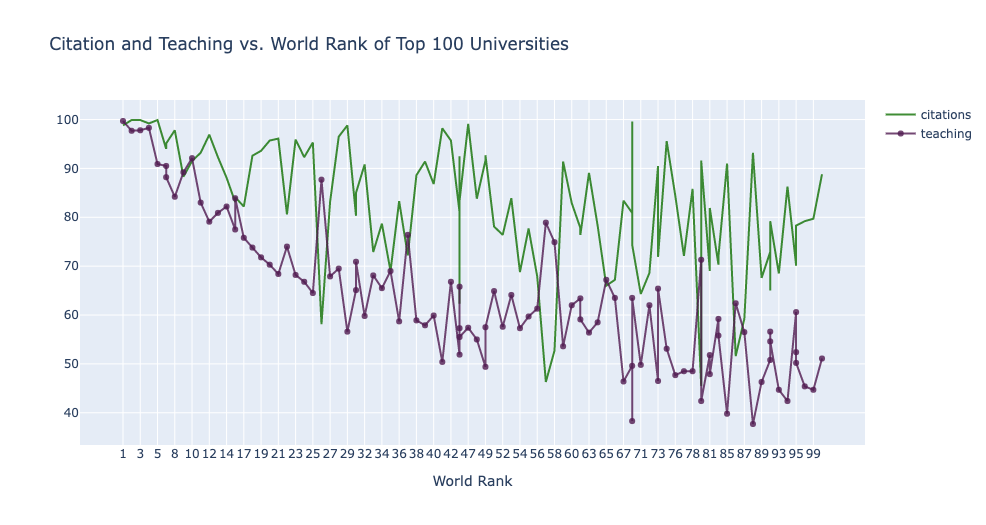

In [34]:
df = timesdata.iloc[:100,:]
#데이터 준비

import plotly.graph_objs as go
import chart_studio.plotly as py
#그래프 라이브러리 import

trace1 = go.Scatter(x = df.world_rank, y = df.citations, mode = 'lines',\
                   name = 'citations', marker = dict(color = 'rgba(16, 112, 2, 0.8)'),\
                   text = df.university_name)
#citation

trace2 = go.Scatter(x = df.world_rank, y = df.teaching, mode = 'lines + markers',\
                   name = 'teaching', marker = dict(color = 'rgba(80, 26, 80, 0.8)'),\
                   text = df.university_name)
#teaching

data = [trace1, trace2]
#데이터 병합

layout = dict(title = 'Citation and Teaching vs. World Rank of Top 100 Universities',\
             xaxis = dict(title = 'World Rank', ticklen = 5, zeroline = False))
#취합 그래프

fig = dict(data = data, layout = layout)
py.iplot(fig)
#시각화

### - 순위권이 높아질수록, 해당 대학교의 인용 점수와 교육(티칭) 퀄리티 점수가 높은 수치로 점차 모이는 모습을 확인할 수 있었습니다.
### - 순위가 내려갈수록, 인용 점수와 교육 점수가 일정하게 높지 않고 편차가 존재한다는 사실을 확인할 수 있었습니다.

# 산점도(Scatter Plot)
  
  ### 2014, 2015, 2016 년도의 top 100 순위권 대학교에 대한 인용 점수의 산점도

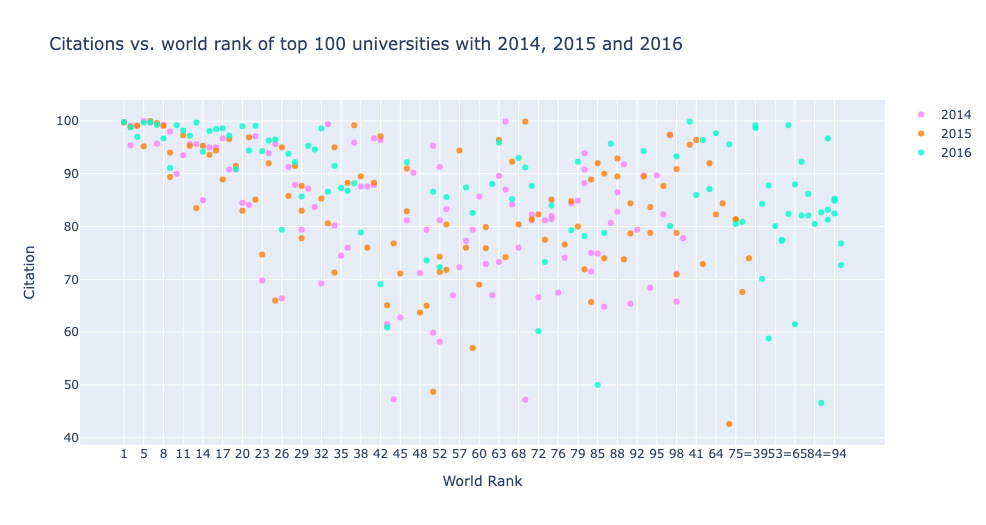

In [35]:
df2014 = timesdata[timesdata.year == 2014].iloc[:100,:]
df2015 = timesdata[timesdata.year == 2015].iloc[:100,:]
df2016 = timesdata[timesdata.year == 2016].iloc[:100,:]
#데이터 준비

trace1 = go.Scatter(x = df2014.world_rank, y = df2014.citations,\
                   mode = 'markers', name = '2014',\
                   marker = dict(color = 'rgba(255, 128, 255, 0.8)'),\
                   text = df2014.university_name)
#2014년도 인용 점수

trace2 = go.Scatter(x = df2015.world_rank, y = df2015.citations,\
                   mode = 'markers', name = '2015',\
                   marker = dict(color = 'rgba(255, 128, 2, 0.8)'),\
                   text = df2015.university_name)
#2015년도 인용 점수

trace3 = go.Scatter(x = df2016.world_rank, y = df2016.citations,\
                   mode = 'markers', name = '2016',\
                   marker = dict(color = 'rgba(0, 255, 200, 0.8)'),\
                   text = df2016.university_name)
#2016년도 인용 점수

data = [trace1, trace2, trace3]
#데이터 병합

layout = dict(title = 'Citations vs. world rank of top 100 universities with 2014, 2015 and 2016',\
             xaxis = dict(title = 'World Rank', ticklen = 5, zeroline = False),\
             yaxis = dict(title = 'Citation', ticklen = 5, zeroline = False))
#취합 그래프

fig = dict(data = data, layout = layout)
py.iplot(fig)
#시각화

### - 순위권이 높아질수록, 연도에 상관없이 해당 대학교의 인용 점수(citations) 가 높은 수치를 유지하는 모습을 확인할 수 있었습니다.

# 막대 그래프(Bar Charts) 
  
  ### 2014 년도의 top 3 순위권 대학교에 대한 인용 점수와 교육(티칭) 퀄리티 점수 비교

In [21]:
df2014 = timesdata[timesdata.year == 2014].iloc[:3,:]
df2014
#데이터 준비

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


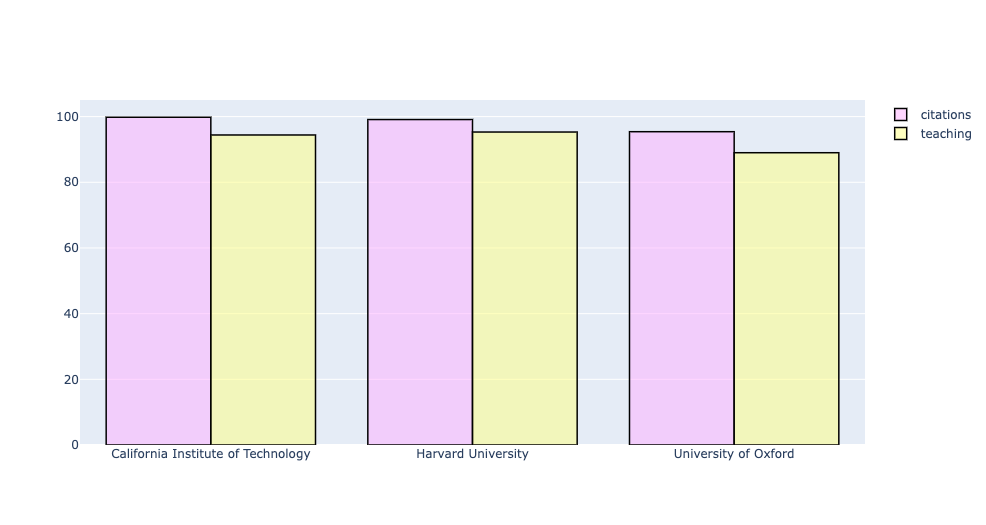

In [36]:
trace1 = go.Bar(x = df2014.university_name, y = df2014.citations, name = 'citations',\
               marker = dict(color = 'rgba(255, 174, 255, 0.5)',\
                           line = dict(color = 'rgb(0, 0, 0)', width = 1.5)),\
               text = df2014.country)
#인용 점수

trace2 = go.Bar(x = df2014.university_name, y = df2014.teaching, name = 'teaching',\
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',\
                           line = dict(color = 'rgb(0, 0, 0)', width = 1.5)),\
               text = df2014.country)
#교육(티칭) 퀄리티 점수

data = [trace1, trace2]
#데이터 병합
layout = go.Layout(barmode = 'group')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)
#시각화

### - top3 대학교 모두 높은 수준의 인용 점수(citations) 와 교육 퀄리티 점수를 확인할 수 있었습니다.

# 막대 그래프(Bar Charts) 2
  
  ### 2014 년도의 top 3 순위권 대학교에 대한 인용 점수와 교육(티칭) 퀄리티 점수 비교(집합을 활용한 구현 방식)

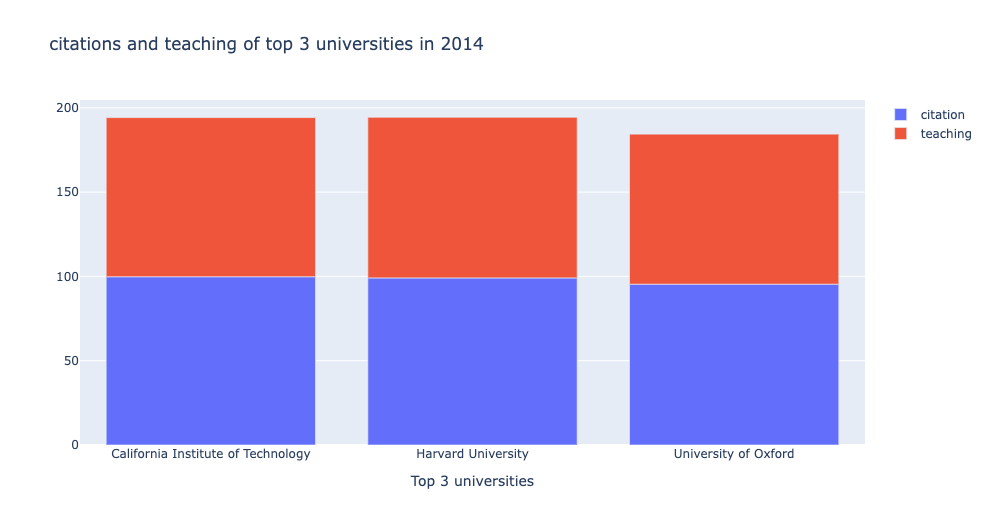

In [41]:
x = df2014.university_name

trace1 = {'x': x, 'y': df2014.citations, 'name': 'citation', 'type': 'bar'};
#인용 점수
trace2 = {'x': x, 'y': df2014.teaching, 'name': 'teaching', 'type': 'bar'};
#교육 퀄리티 점수
data = [trace1, trace2];
#데이터 병합
layout = {'xaxis': {'title': 'Top 3 universities'},\
         'barmode': 'relative', 'title': 'citations and teaching of top 3 universities in 2014'};
#취합 그래프
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)
#시각화

### - 2014년도의 top 3 순위권 대학교의 인용 점수와 교육 퀄리티 점수를 비교했을 때, California Institute of Technology, Havard University 는 유사한 수치를 보였고, University of Oxford 에서 비교적 낮은 인용 점수와 교육 퀄리티 점수를 보였습니다.

# 막대 그래프(Bar Charts) 3
  
  ### 2016년도, 대학교에 대한 연구 실적 점수와 소득 점수 비교(가로 막대 그래프)

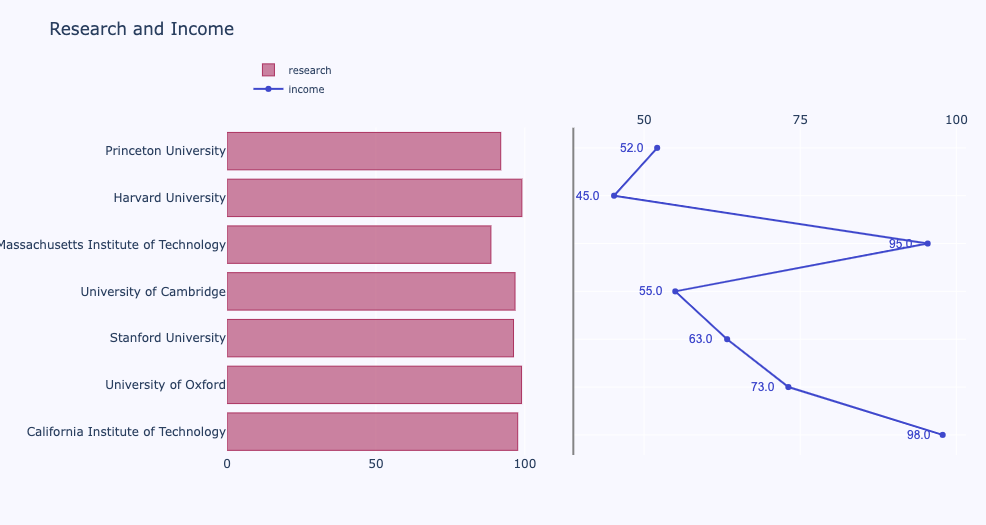

In [40]:
df2016 = timesdata[timesdata.year == 2016].iloc[:7,:]
#데이터 준비

y_saving = [each for each in df2016.research]
y_net_worth = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth = [each for each in df2016.university_name]

trace0 = go.Bar(x = y_saving, y = x_saving,\
               marker = dict(color = 'rgba(171, 50, 96, 0.6)', line = dict(color = 'rgba(171, 50, 96, 1.0)',\
                            width = 1)),name = 'research', orientation = 'h',)
#대학교 연구 실적 점수

trace1 = go.Scatter(x = y_net_worth, y = x_net_worth, mode = 'lines + markers', line = \
                   dict(color = 'rgb(63, 72, 204)'), name = 'income',)
#대학교 소득 점수

layout = dict(title = 'Research and Income', yaxis = dict(showticklabels = True, domain = [0, 0.85]),\
             yaxis2 = dict(showline = True, showticklabels = False, linecolor = 'rgba(102, 102, 102, 0.8)',\
                          linewidth = 2, domain = [0, 0.85]),\
             xaxis = dict(zeroline = False, showline = False, showticklabels = True, showgrid = True,\
                         domain = [0, 0.42]),\
             xaxis2 = dict(zeroline = False, showline = False, showticklabels = True, showgrid = True,\
                          domain = [0.47, 1], side = 'top', dtick = 25),\
             legend = dict(x = 0.029, y = 1.038, font = dict(size = 10)),\
             margin = dict(l = 200, r = 20, t = 70, b = 70),\
             paper_bgcolor = 'rgb(248, 248, 255)',\
             plot_bgcolor = 'rgb(248, 248, 255)',)
#그래프 레이아웃

import numpy as np

annotations = []
y_s = np.round(y_saving, decimals = 2)
y_nw = np.rint(y_net_worth)

for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    
    annotations.append(dict(xref = 'x2', yref = 'y2', y = xd, x = ydn - 4, text = '{:,}'.format(ydn),\
                           font = dict(family = 'Arial', size = 12, color = 'rgb(63, 72, 204)'),\
                           showarrow = False))

layout['annotations'] = annotations
fig = plotly.subplots.make_subplots(rows = 1, cols = 2, specs = [[{}, {}]], shared_xaxes = True,\
                         shared_yaxes = False, vertical_spacing = 0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
#서브플롯 생성

fig['layout'].update(layout)
py.iplot(fig)
#시각화

### - 2016년도, Princeton University 와 MIT 의 연구 실적 점수가 비교적 부족했으며, MIT 와 California Institute of Technology 에서 가장 높은 소득 점수, Harvard University 에서 가장 낮은 소득 점수를 확인할 수 있었습니다.

# 파이 차트(Pie Charts) 
  
  ### 2016년 top 7 대학교에 대한 학생 수 비율 

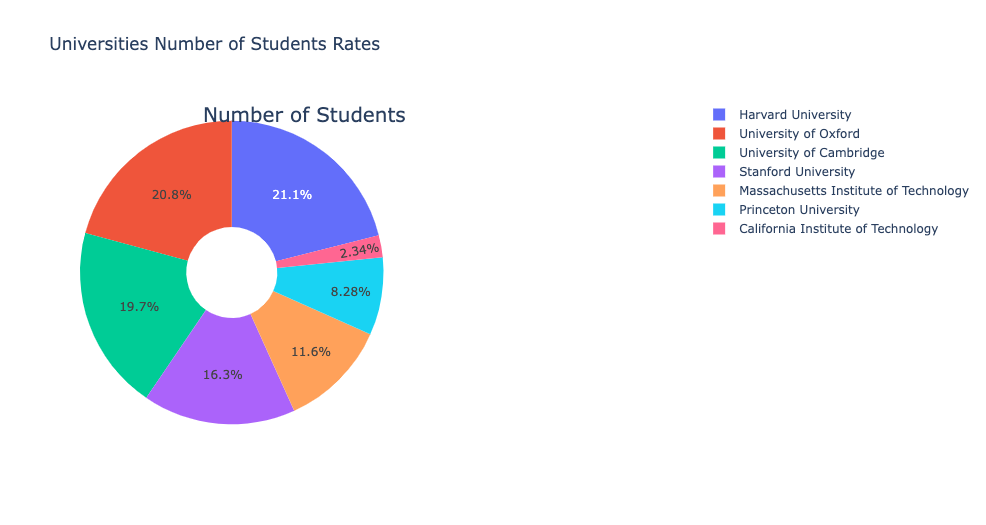

In [42]:
df2016 = timesdata[timesdata.year == 2016].iloc[:7, :]
pie1 = df2016.num_students
#데이터 준비

pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]
#전처리
labels = df2016.university_name

fig = {'data': [
    {'values': pie1_list, 'labels': labels, 'domain': {'x': [0, .5]}, 'name': 'Number of Students Rates',
    'hoverinfo': 'label + percent + name', 'hole': .3, 'type': 'pie'},
], 'layout': {
    'title': 'Universities Number of Students Rates', 'annotations': [
        {'font': {'size': 20}, 'showarrow': False, 'text': 'Number of Students', 'x': 0.20, 'y': 1}
    ]
}}
#파이 차트 생성

py.iplot(fig)
#시각화

### - 2016년도, 옥스포드 대학교와 하버드 대학교에서 비교적 가장 높은 비율의 학생 수 비율을 기록했습니다(20.8 %, 21.1%).

# 버블 차트(Bubble Charts) 
  
  ### 2016년 top 20 순위권 대학교(x축) 에 대한 국제 전망 점수(버블 색깔), 학생 수 비율(버블 크기), 교육 퀄리티 점수(y축) 비교

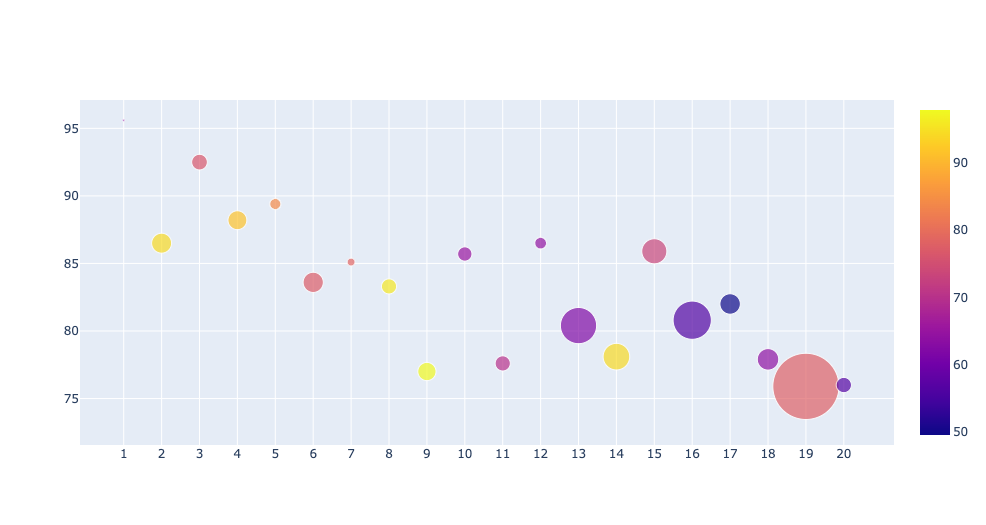

In [43]:
df2016 = timesdata[timesdata.year == 2016].iloc[:20, :]
num_students_size = [float(each.replace(',','.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
#데이터 준비 및 전처리

data = [
    {'y': df2016.teaching, 'x': df2016.world_rank, 'mode': 'markers',
    'marker': {'color': international_color, 'size': num_students_size, 'showscale': True},
    'text': df2016.university_name}
]
#버블 차트 생성

py.iplot(data)
#시각화

### - 2016년도, 대체적으로 순위권이 높을수록 낮은 수치의 학생 수 비율을 기록했습니다.  
### - 순위권이 높을수록 높은 교육 퀄리티 점수가 기록된 것을 확인할 수 있었습니다.
### - 순위권이 높을수록 높은 국제 전망 점수가 기록된 것을 확인할 수 있었습니다.

# 히스토그램(Histogram) 
  
  ### 2011년과 2012년도, 직원 대비 학생 수를 기준으로 대학교 count

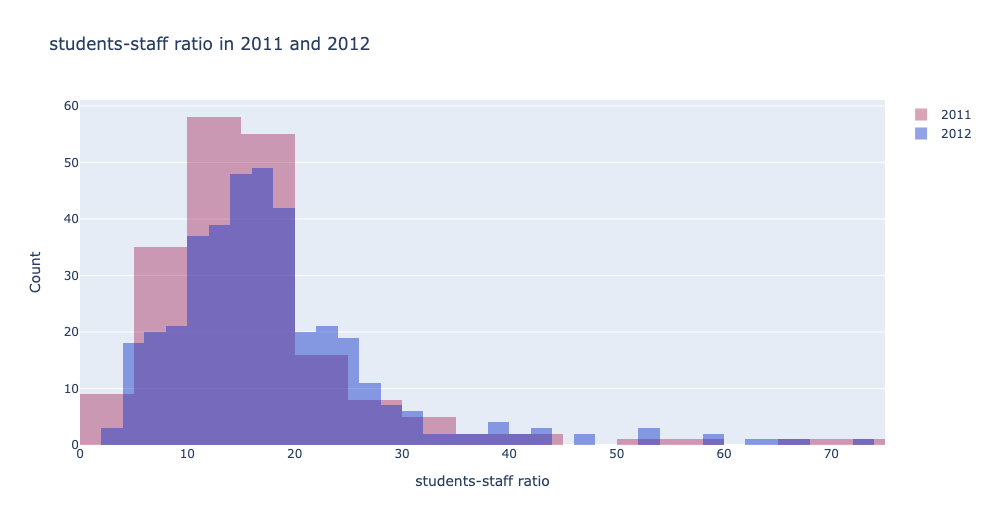

In [44]:
x2011 = timesdata.student_staff_ratio[timesdata.year == 2011]
x2012 = timesdata.student_staff_ratio[timesdata.year == 2012]
#데이터 준비

trace1 = go.Histogram(
x = x2011, opacity = 0.75, name = '2011', marker = dict(color = 'rgba(171, 50, 96, 0.6)'))
#2011년도 히스토그램

trace2 = go.Histogram(
x = x2012, opacity = 0.75, name = '2012', marker = dict(color = 'rgba(12, 50, 196, 0.6)'))
#2012년도 히스토그램

data = [trace1, trace2]
layout = go.Layout(barmode = 'overlay', title = 'students-staff ratio in 2011 and 2012',
                  xaxis = dict(title = 'students-staff ratio'), yaxis = dict(title = 'Count'),)
#그래프 병합

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)
#시각화

### - 대체적으로, 2012년에 비해  2011년에 전 세계 대학교의 직원 대비 학생 수 비율이 높은 사실을 확인할 수 있었습니다.

# 워드 클라우드(Word Cloud) 
  
  ### 2011년도, 데이터프레임에서 가장 많이 언급된 대학교 소재지 시각화

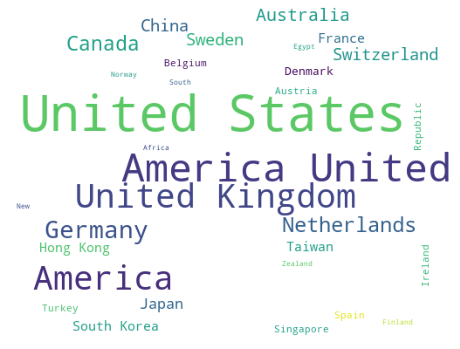

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#라이브러리 import

x2011 = timesdata.country[timesdata.year == 2011]
plt.subplots(figsize = (8, 8))
wordcloud = WordCloud(
background_color = 'white', width = 512, height = 384).generate(' '.join(x2011))
#데이터 준비 및 워드클라우드 생성

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()
#워드클라우드 시각화

### - 2011년도, '미국' 과 '영국' 을 소재지로 한 대학교가 가장 많이 언급됐음을 확인할 수 있었습니다.